## Performance Indicator

It is fundamental for any algorithm to measure the performance. In a multi-objective scenario, we can not calculate the distance to the true global optimum but must consider a set of solutions. Moreover, sometimes the optimum is not even known, and other techniques must be used. 

First, let us consider a scenario where the Pareto-front is known:

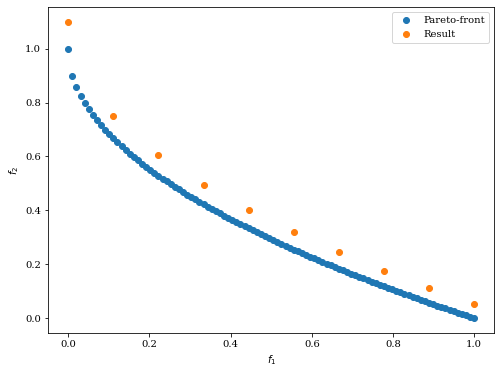

In [1]:
import numpy as np
from pymoo.problems import get_problem
from pymoo.visualization.scatter import Scatter

# The pareto front of a scaled zdt1 problem
pf = get_problem("zdt1").pareto_front()

# The result found by an algorithm
A = pf[::10] * 1.1

# plot the result
Scatter(legend=True).add(pf, label="Pareto-front").add(A, label="Result").show()

### Generational Distance (GD)

The GD performance indicator <cite data-cite="gd"></cite> measure the distance from solution to the Pareto-front. Let us assume the points found by our algorithm are the objective vector set $A=\{a_1, a_2, \ldots, a_{|A|}\}$ and the reference points set (Pareto-front) is $Z=\{z_1, z_2, \ldots, z_{|Z|}\}$. Then, 

\begin{align}
\begin{split}
\text{GD}(A) & = & \; \frac{1}{|A|} \; \bigg( \sum_{i=1}^{|A|} d_i^p \bigg)^{1/p}\\[2mm]
\end{split}
\end{align}

where $d_i$ represents the Euclidean distance (p=2) from $a_i$ to its nearest reference point in $Z$. Basically, this results in the average distance from any point $A$ to the closest point in the Pareto-front.

In [2]:
from pymoo.indicators.gd import GD

ind = GD(pf)
print("GD", ind(A))

GD 0.05497689467314528


### Generational Distance Plus (GD+)

Ishibushi et. al. proposed in <cite data-cite="igd_plus"></cite> GD+:

\begin{align}
\begin{split}
\text{GD}^+(A) & = & \; \frac{1}{|A|} \; \bigg( \sum_{i=1}^{|A|} {d_i^{+}}^2 \bigg)^{1/2}\\[2mm]
\end{split}
\end{align}

where for minimization $d_i^{+} = max \{ a_i - z_i, 0\}$ represents the modified distance from $a_i$ to its nearest reference point in $Z$ with the corresponding value $z_i$.

In [3]:
from pymoo.indicators.gd_plus import GDPlus

ind = GDPlus(pf)
print("GD+", ind(A))

GD+ 0.05497689467314528


### Inverted Generational Distance (IGD)

The IGD performance indicator <cite data-cite="igd"></cite> inverts the generational distance and measures the distance from any point in $Z$ to the closest point in $A$.

\begin{align}
\begin{split}
\text{IGD}(A) & = & \; \frac{1}{|Z|} \; \bigg( \sum_{i=1}^{|Z|} \hat{d_i}^p \bigg)^{1/p}\\[2mm]
\end{split}
\end{align}

where $\hat{d_i}$ represents the euclidean distance (p=2) from $z_i$ to its nearest reference point in $A$.


In [4]:
from pymoo.indicators.igd import IGD

ind = IGD(pf)
print("IGD", ind(A))

IGD 0.06690908300327662


### Inverted Generational Distance Plus (IGD+)

In <cite data-cite="igd_plus"></cite> Ishibushi et. al. proposed IGD+ which is weakly Pareto compliant wheres the original IGD is not.

\begin{align}
\begin{split}
\text{IGD}^{+}(A) & = & \; \frac{1}{|Z|} \; \bigg( \sum_{i=1}^{|Z|} {d_i^{+}}^2 \bigg)^{1/2}\\[2mm]
\end{split}
\end{align}

where for minimization $d_i^{+} = max \{ a_i - z_i, 0\}$ represents the modified distance from $z_i$ to the closest solution in $A$ with the corresponding value $a_i$.


In [5]:
from pymoo.indicators.igd_plus import IGDPlus

ind = IGDPlus(pf)
print("IGD+", ind(A))

IGD+ 0.06466828842775944


### Hypervolume

For all performance indicators showed so far, a target set needs to be known. For Hypervolume only a reference point needs to be provided. First, I would like to mention that we are using the Hypervolume implementation from [DEAP](https://deap.readthedocs.io/en/master/). It calculates the area/volume, which is dominated by the provided set of solutions with respect to a reference point.

<div style="text-align: center;">
    <img src="https://github.com/anyoptimization/pymoo-data/blob/main/docs/images/hv.png?raw=true" width="350">
</div>

This image is taken from <cite data-cite="hv"></cite> and illustrates a two objective example where the area which is dominated by a set of points is shown in grey.
Whereas for the other metrics, the goal was to minimize the distance to the Pareto-front, here, we desire to maximize the performance metric.

In [6]:
from pymoo.indicators.hv import HV

ref_point = np.array([1.2, 1.2])

ind = HV(ref_point=ref_point)
print("HV", ind(A))

HV 0.9631646448182305
